# Datos

In [1]:
!wget https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz
!tar xvzf /content/aclImdb_v1.tar.gz

Se han truncado las últimas 5000 líneas del flujo de salida.
aclImdb/train/unsup/44983_0.txt
aclImdb/train/unsup/44982_0.txt
aclImdb/train/unsup/44981_0.txt
aclImdb/train/unsup/44980_0.txt
aclImdb/train/unsup/44979_0.txt
aclImdb/train/unsup/44978_0.txt
aclImdb/train/unsup/44977_0.txt
aclImdb/train/unsup/44976_0.txt
aclImdb/train/unsup/44975_0.txt
aclImdb/train/unsup/44974_0.txt
aclImdb/train/unsup/44973_0.txt
aclImdb/train/unsup/44972_0.txt
aclImdb/train/unsup/44971_0.txt
aclImdb/train/unsup/44970_0.txt
aclImdb/train/unsup/44969_0.txt
aclImdb/train/unsup/44968_0.txt
aclImdb/train/unsup/44967_0.txt
aclImdb/train/unsup/44966_0.txt
aclImdb/train/unsup/44965_0.txt
aclImdb/train/unsup/44964_0.txt
aclImdb/train/unsup/44963_0.txt
aclImdb/train/unsup/44962_0.txt
aclImdb/train/unsup/44961_0.txt
aclImdb/train/unsup/44960_0.txt
aclImdb/train/unsup/44959_0.txt
aclImdb/train/unsup/44958_0.txt
aclImdb/train/unsup/44957_0.txt
aclImdb/train/unsup/44956_0.txt
aclImdb/train/unsup/44955_0.txt
aclImdb/tra

In [6]:
import os
import numpy as np
import pandas as pd

# NEGATIVAS
dir_neg_train = "aclImdb/train/neg/"
neg_reviews = []

for f in os.listdir(dir_neg_train):
  with open(f"{dir_neg_train}/{f}",encoding = 'UTF-8') as neg:
    neg_reviews.append(neg.read())

dir_neg_test = "aclImdb/test/neg/"
for f in os.listdir(dir_neg_test):
  with open(f"{dir_neg_test}/{f}") as neg:
    neg_reviews.append(neg.read())

# POSITIVAS
dir_pos_train = "aclImdb/train/pos/"
pos_reviews = []

for f in os.listdir(dir_pos_train):
  with open(f"{dir_pos_train}/{f}", encoding = 'UTF-8') as pos:
    pos_reviews.append(pos.read())

dir_pos_test = "aclImdb/test/pos/"
for f in os.listdir(dir_pos_test):
  with open(f"{dir_pos_test}/{f}", encoding = 'UTF-8') as pos:
    pos_reviews.append(pos.read())

# Pandas DF

pos_df = pd.DataFrame(pos_reviews, columns=["REVIEW"])
pos_df["TARGET"] = "POS"
neg_df = pd.DataFrame(neg_reviews, columns=["REVIEW"])
neg_df["TARGET"] = "NEG"

df = pd.concat([pos_df, neg_df], axis="rows")

df = df[df["REVIEW"].apply(len) <= 512].head(500)
df.head()

,REVIEW,TARGET
27,"Timeless musical gem, with Gene Kelly in top f...",POS
32,"Now, many would think to stay away from this m...",POS
36,"""Panic"" is a captivating, blurred-genre film a...",POS
50,This is the weepy that Beaches never was. As m...,POS
57,"Well, I had seen ""They all laughed"" when it ca...",POS


# Instalamos librerías

In [7]:
!pip install transformers
!pip install sentence_transformers
!pip install keybert
!pip install bertopic

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.1/227.1 kB 4.1 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

Cuando termine de correr esta celda, apretar el botón que aparece para reiniciar el entorno.

# Hugging face

https://huggingface.co/


Ejemplo: Traducir texto de inglés a español.

https://huggingface.co/Helsinki-NLP/opus-mt-en-es?text=My+name+is+Sarah+and+I+live+in+London

In [8]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM

tokenizer = AutoTokenizer.from_pretrained("Helsinki-NLP/opus-mt-en-es")

model = AutoModelForSeq2SeqLM.from_pretrained("Helsinki-NLP/opus-mt-en-es")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/44.0 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.47k [00:00<?, ?B/s]

source.spm:   0%|          | 0.00/802k [00:00<?, ?B/s]

target.spm:   0%|          | 0.00/826k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.59M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/models/marian/tokenization_marian.py:175: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


pytorch_model.bin:   0%|          | 0.00/312M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

In [9]:
def translate(x: str) -> str:
    inputs = tokenizer.encode(x, return_tensors='pt')
    outputs = model.generate(inputs)
    return tokenizer.decode(outputs[0])

In [10]:
%%time
translated = df["REVIEW"].head().apply(translate)

for t in translated:
  print(t)

<pad> Joya musical atemporal, con Gene Kelly en la parte superior, dirección elegante de Vincente Minnelli, y maravillosos números musicales. Es un gran entretenimiento de principio a fin, una de esas películas que la gente ve con una sonrisa y dicen "no los hacen como antes!" Pero nunca los hicieron así. La secuencia musical de 25 minutos sin ningún diálogo es una de las más bellas de la historia del cine. La magia de la película, claramente derivada del corazón y el alma de todos los involucrados.</s>
<pad> Ahora, muchos pensarían mantenerse alejados de esta película sólo por el título. Si usted no tiene el estómago para las películas sangrientas, entonces, ¿qué estás haciendo leyendo esta crítica? De todos modos, tomé prestado el vídeo de un amigo mío y me enamoré de esta película inmediatamente. Esta película está lleno de gore maravilloso, además de los otros ingredientes habituales que componen una película b añadir a un infierno de una experiencia de visualización! Si usted es u

# KeyBERT



In [11]:
from keybert import KeyBERT

kw_model = KeyBERT()

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

- Top n: Cantidad de keywords por review
- keyphrase_ngram_range: Cantidad de palabras por keyword (keyphrase)

In [12]:
%%time
df["KEYWORDS"] = df.REVIEW.apply(lambda x: kw_model.extract_keywords(x, top_n=3, keyphrase_ngram_range=(1,1)))

CPU times: user 1min 30s, sys: 28.4 s, total: 1min 58s
Wall time: 1min 33s


In [13]:
pd.set_option("display.max_colwidth", None)

In [14]:
df.head()

,REVIEW,TARGET,KEYWORDS
27,"Timeless musical gem, with Gene Kelly in top form, stylish direction by Vincente Minnelli, and wonderful musical numbers. It is great entertainment from start to finish, one of those films that people watch with a smile and say ""they don't make 'em like they used to!"" But they never did quite make them like this. The climactic 25 minute musical sequence without any dialogue is among the most beautiful in film history. Movie magic, clearly derived from the heart and soul of everyone involved. A must see!",POS,"[(musical, 0.5268), (timeless, 0.3499), (magic, 0.3268)]"
32,"Now, many would think to stay away from this movie just because of the title. If you do not have the stomach for gory movies, then what are you doing reading this review? Anyhow, I borrowed the video from a friend of mine and fell in love with this movie immediately. This movie is chock full of wonderful gore, plus the usual other ingredients that make up a b-movie add up to one hell of a viewing experience! If you're a lover of good quality experiences, then by all means, watch this great flick!",POS,"[(gory, 0.4139), (movie, 0.3144), (movies, 0.2438)]"
36,"""Panic"" is a captivating, blurred-genre film about a brooding and conflicted middle aged hitman's reconciliation of infatuation with a younger uninhibited hairstylist, his love of wife and son, his duty to his employer/father with his own identity. Although the film has a nebulous purpose and an ambiguous ending, it is a superb production in almost all aspects. The characters' clarity and sincerity in such an improbable story may both fascinate and annoy audiences.",POS,"[(panic, 0.6034), (infatuation, 0.3476), (hitman, 0.2985)]"
50,"This is the weepy that Beaches never was. As much as I wanted to love Beaches, it always seemed too hurried for me to ""feel"" for it (its soundtrack is one of my favorite albums though). Stella, on the other hand, moves at a slower (and occasionally too slow) pace and though it's somewhat manipulative in its tears-inducing tale about a self-sacrificial mother, it works because Bette and the rest of the cast turn in great performances. 10/10",POS,"[(beaches, 0.483), (stella, 0.4585), (weepy, 0.3741)]"
57,"Well, I had seen ""They all laughed"" when it came out in<br /><br />Europe around 1982 and had kept a vague but dear souvenir of it. I 've just seen it again on tape, almost twenty years after... Bogdanovich has a true heartfelt tenderness over his characters and a kind sympathy which is difficult not to feel also. Excellent comedians and actors, good lines all over and for everyone and pretty good editing, too. I laughed and smiled all the time. Just as we all do, at times. Go get it.",POS,"[(bogdanovich, 0.4256), (laughed, 0.3411), (comedians, 0.3323)]"


Podemos ver que además de la keyword, nos trae un score para cada keyword.

Vamos a eliminar el score y quedarnos únicamente con las kw:

In [15]:
df["KEYWORDS"] = df.KEYWORDS.apply(lambda keywords: [k[0] for k in keywords])

In [16]:
df.head()

,REVIEW,TARGET,KEYWORDS
27,"Timeless musical gem, with Gene Kelly in top form, stylish direction by Vincente Minnelli, and wonderful musical numbers. It is great entertainment from start to finish, one of those films that people watch with a smile and say ""they don't make 'em like they used to!"" But they never did quite make them like this. The climactic 25 minute musical sequence without any dialogue is among the most beautiful in film history. Movie magic, clearly derived from the heart and soul of everyone involved. A must see!",POS,"[musical, timeless, magic]"
32,"Now, many would think to stay away from this movie just because of the title. If you do not have the stomach for gory movies, then what are you doing reading this review? Anyhow, I borrowed the video from a friend of mine and fell in love with this movie immediately. This movie is chock full of wonderful gore, plus the usual other ingredients that make up a b-movie add up to one hell of a viewing experience! If you're a lover of good quality experiences, then by all means, watch this great flick!",POS,"[gory, movie, movies]"
36,"""Panic"" is a captivating, blurred-genre film about a brooding and conflicted middle aged hitman's reconciliation of infatuation with a younger uninhibited hairstylist, his love of wife and son, his duty to his employer/father with his own identity. Although the film has a nebulous purpose and an ambiguous ending, it is a superb production in almost all aspects. The characters' clarity and sincerity in such an improbable story may both fascinate and annoy audiences.",POS,"[panic, infatuation, hitman]"
50,"This is the weepy that Beaches never was. As much as I wanted to love Beaches, it always seemed too hurried for me to ""feel"" for it (its soundtrack is one of my favorite albums though). Stella, on the other hand, moves at a slower (and occasionally too slow) pace and though it's somewhat manipulative in its tears-inducing tale about a self-sacrificial mother, it works because Bette and the rest of the cast turn in great performances. 10/10",POS,"[beaches, stella, weepy]"
57,"Well, I had seen ""They all laughed"" when it came out in<br /><br />Europe around 1982 and had kept a vague but dear souvenir of it. I 've just seen it again on tape, almost twenty years after... Bogdanovich has a true heartfelt tenderness over his characters and a kind sympathy which is difficult not to feel also. Excellent comedians and actors, good lines all over and for everyone and pretty good editing, too. I laughed and smiled all the time. Just as we all do, at times. Go get it.",POS,"[bogdanovich, laughed, comedians]"


Si luego vamos a hacer algún análisis de estas keywords, seguramente sea una buena opción lemmatizarlas:

In [17]:
import spacy
nlp = spacy.load('en_core_web_sm')

def lemma(review:str) -> str:
    """
    Lemmatize using spacy.
    """

    doc = nlp(review)
    lemma_review = []
    for token in doc:
        lemma_review.append(token.lemma_)

    return " ".join(lemma_review)

In [18]:
df["KEYWORDS"] = df["KEYWORDS"].apply(lambda kw: [lemma(k) for k in kw])

In [19]:
df.head()

,REVIEW,TARGET,KEYWORDS
27,"Timeless musical gem, with Gene Kelly in top form, stylish direction by Vincente Minnelli, and wonderful musical numbers. It is great entertainment from start to finish, one of those films that people watch with a smile and say ""they don't make 'em like they used to!"" But they never did quite make them like this. The climactic 25 minute musical sequence without any dialogue is among the most beautiful in film history. Movie magic, clearly derived from the heart and soul of everyone involved. A must see!",POS,"[musical, timeless, magic]"
32,"Now, many would think to stay away from this movie just because of the title. If you do not have the stomach for gory movies, then what are you doing reading this review? Anyhow, I borrowed the video from a friend of mine and fell in love with this movie immediately. This movie is chock full of wonderful gore, plus the usual other ingredients that make up a b-movie add up to one hell of a viewing experience! If you're a lover of good quality experiences, then by all means, watch this great flick!",POS,"[gory, movie, movie]"
36,"""Panic"" is a captivating, blurred-genre film about a brooding and conflicted middle aged hitman's reconciliation of infatuation with a younger uninhibited hairstylist, his love of wife and son, his duty to his employer/father with his own identity. Although the film has a nebulous purpose and an ambiguous ending, it is a superb production in almost all aspects. The characters' clarity and sincerity in such an improbable story may both fascinate and annoy audiences.",POS,"[panic, infatuation, hitman]"
50,"This is the weepy that Beaches never was. As much as I wanted to love Beaches, it always seemed too hurried for me to ""feel"" for it (its soundtrack is one of my favorite albums though). Stella, on the other hand, moves at a slower (and occasionally too slow) pace and though it's somewhat manipulative in its tears-inducing tale about a self-sacrificial mother, it works because Bette and the rest of the cast turn in great performances. 10/10",POS,"[beach, stella, weepy]"
57,"Well, I had seen ""They all laughed"" when it came out in<br /><br />Europe around 1982 and had kept a vague but dear souvenir of it. I 've just seen it again on tape, almost twenty years after... Bogdanovich has a true heartfelt tenderness over his characters and a kind sympathy which is difficult not to feel also. Excellent comedians and actors, good lines all over and for everyone and pretty good editing, too. I laughed and smiled all the time. Just as we all do, at times. Go get it.",POS,"[bogdanovich, laugh, comedian]"


Ahora podemos ver la popularidad de las keywords:

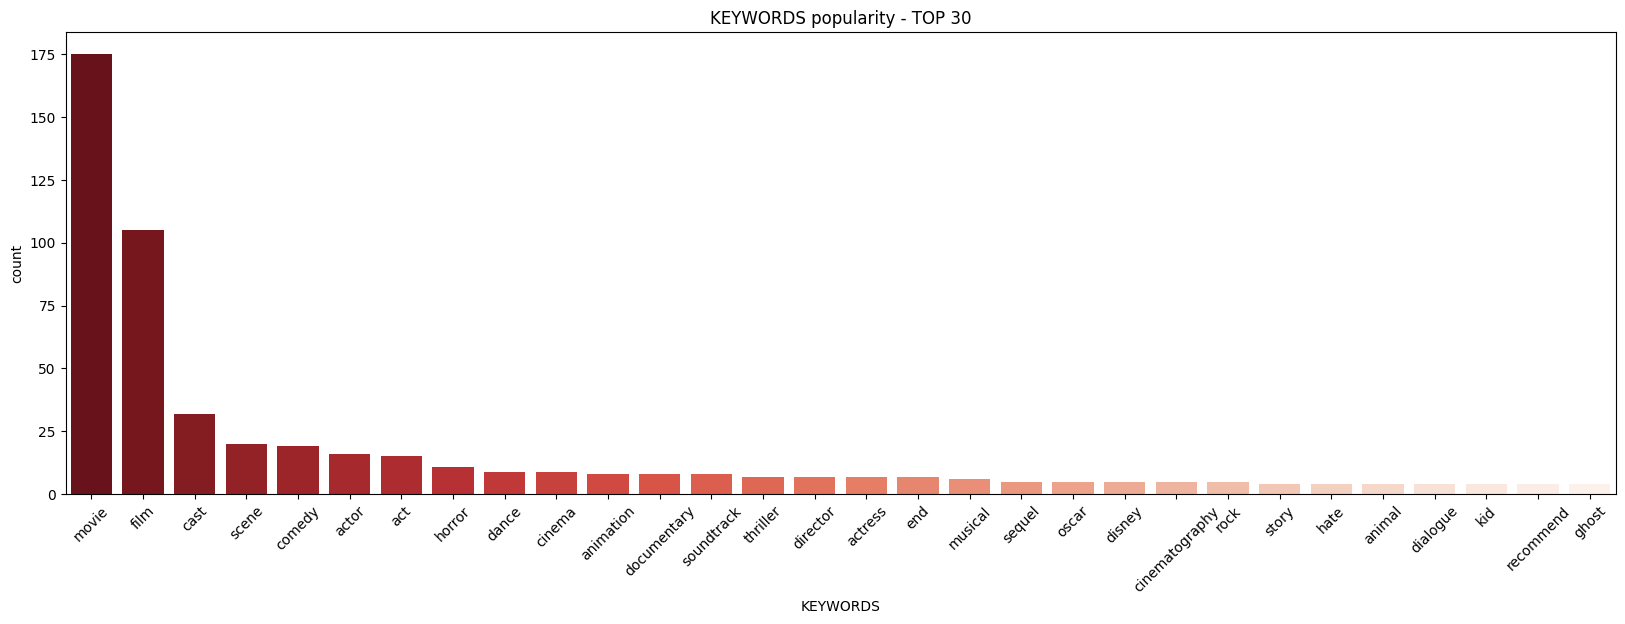

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

df_exploded = df.explode('KEYWORDS').reset_index(drop=True)

# Plot
plt.figure(figsize=(20, 6))
sns.countplot(x=df_exploded.KEYWORDS,
              order=df_exploded.KEYWORDS.value_counts().index[:30],
              palette='Reds_r')
plt.title("KEYWORDS popularity - TOP 30")
plt.xticks(rotation=45)
plt.show()

# BERTopic

Ahora utilizaremos BERTopic para extraer tópicos.

In [25]:
from bertopic import BERTopic

In [26]:
%%time
topic_model = BERTopic(calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(df["REVIEW"].values)

2024-06-18 21:25:21,113 - BERTopic - Embedding - Transforming documents to embeddings.


Batches:   0%|          | 0/16 [00:00<?, ?it/s]

2024-06-18 21:25:49,587 - BERTopic - Embedding - Completed ✓
2024-06-18 21:25:49,590 - BERTopic - Dimensionality - Fitting the dimensionality reduction algorithm
2024-06-18 21:26:03,714 - BERTopic - Dimensionality - Completed ✓
2024-06-18 21:26:03,716 - BERTopic - Cluster - Start clustering the reduced embeddings
2024-06-18 21:26:03,756 - BERTopic - Cluster - Completed ✓
2024-06-18 21:26:03,764 - BERTopic - Representation - Extracting topics from clusters using representation models.
2024-06-18 21:26:03,832 - BERTopic - Representation - Completed ✓


CPU times: user 39.1 s, sys: 1.07 s, total: 40.2 s
Wall time: 42.8 s


In [27]:
topics_data = topic_model.get_topic_info()
topics_data

,Topic,Count,Name,Representation,Representative_Docs
0,-1,294,-1_the_and_is_of,"[the, and, is, of, it, this, to, movie, in, was]","[I think this is what this movie wants us to say at the end of the movie! or Damn Australian? I still don't know, but what I know is that I really liked this movie but that couldn't be my favorite movie!<br /><br />Great story with great actors but with a terrible end... To make you cry and say 'Oh, she's so good'... Still, who made it? What really happened? Who's that guy? No answer to these questions...<br /><br />Mysterious movie with a good mark overall... I give it a 8/10, going on the 8.5!, I really have to say, this was always a favorite of mine when I went to see my grandma. And it still is. It is very, very close to the book. The way it is filmed, and the players were just all excellent! I have to recommend this movie to everyone who hasn't seen it. Almost everyone I talk to hates TV movies, but this was really great! I gave it 10/10., What can i say about the first film ever?<br /><br />You can't rate this, because it's not supposed to be entertaining. But if you HAVE to rate it, you should give it a 10. It is stunning to see moving images from the year 1895. This was one of the most important movies in history. I wonder how it was to be one of the people who saw the first movie ever!<br /><br />]"
1,0,42,0_the_it_of_and,"[the, it, of, and, this, was, to, movie, is, horror]","[Well this movie was probobly one of the funniest scary movie i have ever seen. The effects are so bad you just have to laugh, and the acting, well lets say its no mel gibson. But Gary Browning who plays an police officer is so damn bad, he becomes good. I dont know how but he him self makes this movie a 10. You must see it if your in to horror/slash movies cause its bloody and funny at the same time. Killer movie., I think that the movie was kind of weird. In the opening scene, a person is killed for no reason. He doesn't get mentioned again. The special effects could have also be better but i enjoyed watching an older horror movie. It isn't the best example of a classic horror movie but it still was an alright movie. I give it about a 5 out of 10 of the scale., Down To Earth is the best movie!!! It is SO funny, and it's really sweet too. It has a good plot and it's unique. It isn't like those movies that are all the same with the similar story lines, and it's not all comedy and no story. This movie also has a very good ending.]"
2,1,38,1_the_it_and_is,"[the, it, and, is, of, this, br, funny, to, you]","[<br /><br />This is without a doubt the funniest comedy of the year. Everybody is brilliant. The acting is superb. You can see that the actors enjoyed making this film. It´s a shame to spoil the film with give aways, so rent it and laugh your ass off.<br /><br />9 - 10., This is one of the funniest movies I have ever seen. If you know the Real World and the people from those shows, this movie will be top notch, if you have never seen the real world you will still think it is an extremely funny movie but you won't get some of the inside jokes about the actors and the tv show., This movie is plain fun.I has nothing to do with the original America Pie, but it is fun to watch.<br /><br />Another try, but better than Band camp and The naked mile, at least funnier.<br /><br />Just after first five minutes i was laughing my ass out, so I decided to call my friend and we would watch it together.We had a few beers and we had fun.<br /><br />You will not find any deep message in this movie, but it's worth watching.<br /><br />So, lay back and just enjoy.]"
3,2,38,2_the_and_this_of,"[the, and, this, of, to, it, in, movie, is, film]","[This was one of the best war movies I've seen because it focuses on the characters more then the actual war. All of the cast do an excellent job and because most of them are relative unknowns it makes everything seem more believable. The camera footage is great is so was the pacing and editing. T

El topico -1 corresponde a outliers.

In [28]:
df["TOPIC_ID"] = topics
df = df.merge(topics_data, left_on="TOPIC_ID", right_on="Topic", how="left")
df = df.rename(columns={"Name": "TOPIC_NAME", "Count": "TOPIC_POPULARITY"})
df = df.drop(["Topic"], axis=1)
df.head(3)

,REVIEW,TARGET,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,Representation,Representative_Docs
0,"Timeless musical gem, with Gene Kelly in top form, stylish direction by Vincente Minnelli, and wonderful musical numbers. It is great entertainment from start to finish, one of those films that people watch with a smile and say ""they don't make 'em like they used to!"" But they never did quite make them like this. The climactic 25 minute musical sequence without any dialogue is among the most beautiful in film history. Movie magic, clearly derived from the heart and soul of everyone involved. A must see!",POS,"[musical, timeless, magic]",-1,294,-1_the_and_is_of,"[the, and, is, of, it, this, to, movie, in, was]","[I think this is what this movie wants us to say at the end of the movie! or Damn Australian? I still don't know, but what I know is that I really liked this movie but that couldn't be my favorite movie!<br /><br />Great story with great actors but with a terrible end... To make you cry and say 'Oh, she's so good'... Still, who made it? What really happened? Who's that guy? No answer to these questions...<br /><br />Mysterious movie with a good mark overall... I give it a 8/10, going on the 8.5!, I really have to say, this was always a favorite of mine when I went to see my grandma. And it still is. It is very, very close to the book. The way it is filmed, and the players were just all excellent! I have to recommend this movie to everyone who hasn't seen it. Almost everyone I talk to hates TV movies, but this was really great! I gave it 10/10., What can i say about the first film ever?<br /><br />You can't rate this, because it's not supposed to be entertaining. But if you HAVE to rate it, you should give it a 10. It is stunning to see moving images from the year 1895. This was one of the most important movies in history. I wonder how it was to be one of the people who saw the first movie ever!<br /><br />]"
1,"Now, many would think to stay away from this movie just because of the title. If you do not have the stomach for gory movies, then what are you doing reading this review? Anyhow, I borrowed the video from a friend of mine and fell in love with this movie immediately. This movie is chock full of wonderful gore, plus the usual other ingredients that make up a b-movie add up to one hell of a viewing experience! If you're a lover of good quality experiences, then by all means, watch this great flick!",POS,"[gory, movie, movie]",0,42,0_the_it_of_and,"[the, it, of, and, this, was, to, movie, is, horror]","[Well this movie was probobly one of the funniest scary movie i have ever seen. The effects are so bad you just have to laugh, and the acting, well lets say its no mel gibson. But Gary Browning who plays an police officer is so damn bad, he becomes good. I dont know how but he him self makes this movie a 10. You must see it if your in to horror/slash movies cause its bloody and funny at the same time. Killer movie., I think that the movie was kind of weird. In the opening scene, a person is killed for no reason. He doesn't get mentioned again. The special effects could have also be better but i enjoyed watching an older horror movie. It isn't the best example of a classic horror movie but it still was an alright movie. I give it about a 5 out of 10 of the scale., Down To Earth is the best movie!!! It is SO funny, and it's really sweet too. It has a good plot and it's unique. It isn't like those movies that are all the same with the similar story lines, and it's not all comedy and no story. This movie also has a very good ending.]"
2,"""Panic"" is a captivating, blurred-genre film about a brooding and conflicted middle aged hitman's reconciliation of infatuation with a younger uninhibited hairstylist, his love of wife and son, his duty to his employer/father with his own identity. Although the film has a nebulous purpose and an ambiguous ending, it is a superb production in almost all aspects. The characters' clarity an

In [29]:
topic_model.visualize_topics()

Keywords más frecuentes en cada tópico

In [30]:
topic_keywords = df.explode("KEYWORDS").groupby(["TOPIC_ID"]).agg({"KEYWORDS": pd.Series.mode})
topic_keywords = topic_keywords.rename(columns={"KEYWORDS": "TOPIC_MOST_FREQ_KEYWORD"})
df = df.merge(topic_keywords, how='left', on="TOPIC_ID")
df.head()

,REVIEW,TARGET,KEYWORDS,TOPIC_ID,TOPIC_POPULARITY,TOPIC_NAME,Representation,Representative_Docs,TOPIC_MOST_FREQ_KEYWORD
0,"Timeless musical gem, with Gene Kelly in top form, stylish direction by Vincente Minnelli, and wonderful musical numbers. It is great entertainment from start to finish, one of those films that people watch with a smile and say ""they don't make 'em like they used to!"" But they never did quite make them like this. The climactic 25 minute musical sequence without any dialogue is among the most beautiful in film history. Movie magic, clearly derived from the heart and soul of everyone involved. A must see!",POS,"[musical, timeless, magic]",-1,294,-1_the_and_is_of,"[the, and, is, of, it, this, to, movie, in, was]","[I think this is what this movie wants us to say at the end of the movie! or Damn Australian? I still don't know, but what I know is that I really liked this movie but that couldn't be my favorite movie!<br /><br />Great story with great actors but with a terrible end... To make you cry and say 'Oh, she's so good'... Still, who made it? What really happened? Who's that guy? No answer to these questions...<br /><br />Mysterious movie with a good mark overall... I give it a 8/10, going on the 8.5!, I really have to say, this was always a favorite of mine when I went to see my grandma. And it still is. It is very, very close to the book. The way it is filmed, and the players were just all excellent! I have to recommend this movie to everyone who hasn't seen it. Almost everyone I talk to hates TV movies, but this was really great! I gave it 10/10., What can i say about the first film ever?<br /><br />You can't rate this, because it's not supposed to be entertaining. But if you HAVE to rate it, you should give it a 10. It is stunning to see moving images from the year 1895. This was one of the most important movies in history. I wonder how it was to be one of the people who saw the first movie ever!<br /><br />]",movie
1,"Now, many would think to stay away from this movie just because of the title. If you do not have the stomach for gory movies, then what are you doing reading this review? Anyhow, I borrowed the video from a friend of mine and fell in love with this movie immediately. This movie is chock full of wonderful gore, plus the usual other ingredients that make up a b-movie add up to one hell of a viewing experience! If you're a lover of good quality experiences, then by all means, watch this great flick!",POS,"[gory, movie, movie]",0,42,0_the_it_of_and,"[the, it, of, and, this, was, to, movie, is, horror]","[Well this movie was probobly one of the funniest scary movie i have ever seen. The effects are so bad you just have to laugh, and the acting, well lets say its no mel gibson. But Gary Browning who plays an police officer is so damn bad, he becomes good. I dont know how but he him self makes this movie a 10. You must see it if your in to horror/slash movies cause its bloody and funny at the same time. Killer movie., I think that the movie was kind of weird. In the opening scene, a person is killed for no reason. He doesn't get mentioned again. The special effects could have also be better but i enjoyed watching an older horror movie. It isn't the best example of a classic horror movie but it still was an alright movie. I give it about a 5 out of 10 of the scale., Down To Earth is the best movie!!! It is SO funny, and it's really sweet too. It has a good plot and it's unique. It isn't like those movies that are all the same with the similar story lines, and it's not all comedy and no story. This movie also has a very good ending.]",movie
2,"""Panic"" is a captivating, blurred-genre film about a brooding and conflicted middle aged hitman's reconciliation of infatuation with a younger uninhibited hairstylist, his love of wife and son, his duty to his employer/father with his own identity. Although the film has a nebulous purpose and an ambiguous ending, it is a superb production in almost all

Además, podríamos obtener sentimiento de cada review y luego asociar tópicos a sentimientos o keywor